# Sports Analytics Hackathon

Australia tour of India - 2019

Predict the results for:

- Winner of the series.
- Series output.
- Highest run scorer.
- Highest wicket-taker.
- Maximum sixes.
- Maximum fours.

In [1021]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [1022]:
# Import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To Scale the data
from sklearn.preprocessing import StandardScaler

#Improting the PCA module
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Reading and Understanding the Data

We have gathered the following data:
- Series Statistics
    - 1. As this series will be played in India, in one dataset we have collected all the match results of India played within India in last 10 years.
    - 2. In second dataset we have just included the data of last series played bwtween India and Australia in Australia.
    
- Batsmen Statistics
    - This dataset will help us in predicting highest run scorer, maximum sixes and fours.
    
- Bowlers Statistics
    - This dataset will help us in predicting the highest wicket taker.

In [1023]:
# Import and read dataset 1
df_series = pd.read_csv('Series_Stats.csv')
df_series.head(10)

,Winner,Result,Margin,BR,Match,Ground,Start Date
0,Australia,won,4 runs,NaN,India v Australia,Vadodara,25-Oct-09
1,India,won,99 runs,NaN,India v Australia,Nagpur,28-Oct-09
2,India,won,6 wickets,10.0,India v Australia,Delhi,31-Oct-09
3,Australia,won,24 runs,NaN,India v Australia,Mohali,02-Nov-09
4,Australia,won,3 runs,NaN,India v Australia,Hyderabad (Deccan),05-Nov-09
5,Australia,won,6 wickets,49.0,India v Australia,Guwahati,08-Nov-09
6,NaN,aban,-,NaN,India v Australia,Mumbai,11-Nov-09
7,India,won,3 runs,NaN,India v Sri Lanka,Rajkot,15-Dec-09
8,Sri Lanka,won,3 wickets,5.0,India v Sri Lanka,Nagpur,18-Dec-09
9,India,won,7 wickets,45.0,India v Sri Lanka,Cuttack,21-Dec-09


In [1024]:
df_series.shape

(102, 7)

Let's filter out the matches played between India and Australia.

In [1025]:
df_series = df_series[df_series['Match'] == 'India v Australia']

In [1026]:
df_series.head(10)

,Winner,Result,Margin,BR,Match,Ground,Start Date
0,Australia,won,4 runs,NaN,India v Australia,Vadodara,25-Oct-09
1,India,won,99 runs,NaN,India v Australia,Nagpur,28-Oct-09
2,India,won,6 wickets,10.0,India v Australia,Delhi,31-Oct-09
3,Australia,won,24 runs,NaN,India v Australia,Mohali,02-Nov-09
4,Australia,won,3 runs,NaN,India v Australia,Hyderabad (Deccan),05-Nov-09
5,Australia,won,6 wickets,49.0,India v Australia,Guwahati,08-Nov-09
6,NaN,aban,-,NaN,India v Australia,Mumbai,11-Nov-09
15,NaN,aban,-,NaN,India v Australia,Kochi,17-Oct-10
16,India,won,5 wickets,7.0,India v Australia,Visakhapatnam,20-Oct-10
17,NaN,aban,-,NaN,India v Australia,Margao,24-Oct-10


In [1027]:
df_series.shape

(23, 7)

In [1028]:
df_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 90
Data columns (total 7 columns):
Winner        18 non-null object
Result        23 non-null object
Margin        23 non-null object
BR            9 non-null float64
Match         23 non-null object
Ground        23 non-null object
Start Date    23 non-null object
dtypes: float64(1), object(6)
memory usage: 1.4+ KB


Let's drop the matches which does not have a clear winner.

In [1029]:
df_series = df_series[~df_series.Winner.isnull()]
df_series.head(10)

,Winner,Result,Margin,BR,Match,Ground,Start Date
0,Australia,won,4 runs,NaN,India v Australia,Vadodara,25-Oct-09
1,India,won,99 runs,NaN,India v Australia,Nagpur,28-Oct-09
2,India,won,6 wickets,10.0,India v Australia,Delhi,31-Oct-09
3,Australia,won,24 runs,NaN,India v Australia,Mohali,02-Nov-09
4,Australia,won,3 runs,NaN,India v Australia,Hyderabad (Deccan),05-Nov-09
5,Australia,won,6 wickets,49.0,India v Australia,Guwahati,08-Nov-09
16,India,won,5 wickets,7.0,India v Australia,Visakhapatnam,20-Oct-10
32,India,won,5 wickets,14.0,India v Australia,Ahmedabad,24-Mar-11
53,Australia,won,72 runs,NaN,India v Australia,Pune,13-Oct-13
54,India,won,9 wickets,39.0,India v Australia,Jaipur,16-Oct-13


In [1030]:
df_series.shape

(18, 7)

In [1031]:
df_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 90
Data columns (total 7 columns):
Winner        18 non-null object
Result        18 non-null object
Margin        18 non-null object
BR            9 non-null float64
Match         18 non-null object
Ground        18 non-null object
Start Date    18 non-null object
dtypes: float64(1), object(6)
memory usage: 1.1+ KB


Let's visualize the match winners

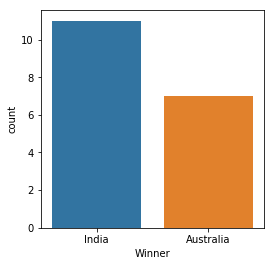

In [1032]:
plt.figure(figsize=(4,4))
sns.countplot(x='Winner', data=df_series, order = df_series.Winner.value_counts().index)

This data clearly shows India has a better winning ratio for matches played against Australia within India

Let's also check the data of the last series.

#### Last series Analysis (held in Australia)

In [1131]:
# Import and read dataset 2
df_last_series = pd.read_csv('Last_Series_Stats.csv')
df_last_series.head()

,Winner,Result,Margin,BR,Match,Ground,Start Date
0,India,won,7 wickets,4.0,Australia v India,Melbourne,18-Jan-19
1,India,won,6 wickets,4.0,Australia v India,Adelaide,15-Jan-19
2,Australia,won,34 runs,NaN,Australia v India,Sydney,12-Jan-19


In [1034]:
df_last_series = df_last_series.dropna(how = 'all')
df_last_series.head()

,Winner,Result,Margin,BR,Match,Ground,Start Date
0,India,won,7 wickets,4.0,Australia v India,Melbourne,18-Jan-19
1,India,won,6 wickets,4.0,Australia v India,Adelaide,15-Jan-19
2,Australia,won,34 runs,NaN,Australia v India,Sydney,12-Jan-19


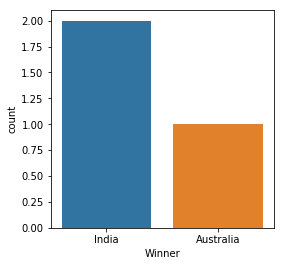

In [1035]:
plt.figure(figsize=(4,4))
sns.countplot(x='Winner', data=df_last_series, order = df_last_series.Winner.value_counts().index)

In last ODI series between India and Australia, India has better winning ratio

#### Winner of the series

Observation:
 - India's record against Australia is good on Indian soil.
 - India's win against Austria in the last series shows that currently India is in good form. 

Conclusion:
 - **India will win the series against Australia.**

Let's now predict the series output.

In [1036]:
# Concatenate the two dataframes
df_series = pd.concat([df_series, df_last_series], ignore_index=True)

In [1037]:
df_series.shape

(21, 7)

Let's now check the series result from these matches

In [1038]:
df_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
Winner        21 non-null object
Result        21 non-null object
Margin        21 non-null object
BR            11 non-null float64
Match         21 non-null object
Ground        21 non-null object
Start Date    21 non-null object
dtypes: float64(1), object(6)
memory usage: 1.2+ KB


In [1039]:
df_series

,Winner,Result,Margin,BR,Match,Ground,Start Date
0,Australia,won,4 runs,NaN,India v Australia,Vadodara,25-Oct-09
1,India,won,99 runs,NaN,India v Australia,Nagpur,28-Oct-09
2,India,won,6 wickets,10.0,India v Australia,Delhi,31-Oct-09
3,Australia,won,24 runs,NaN,India v Australia,Mohali,02-Nov-09
4,Australia,won,3 runs,NaN,India v Australia,Hyderabad (Deccan),05-Nov-09
5,Australia,won,6 wickets,49.0,India v Australia,Guwahati,08-Nov-09
6,India,won,5 wickets,7.0,India v Australia,Visakhapatnam,20-Oct-10
7,India,won,5 wickets,14.0,India v Australia,Ahmedabad,24-Mar-11
8,Australia,won,72 runs,NaN,India v Australia,Pune,13-Oct-13
9,India,won,9 wickets,39.0,India v Australia,Jaipur,16-Oct-13


In [1040]:
# Convert 'Start Date' to date
df_series['Start Date'] = pd.to_datetime(df_series['Start Date'])

In [1041]:
df_series['Year'] = pd.DatetimeIndex(df_series['Start Date']).year

In [1042]:
df_series.head()

,Winner,Result,Margin,BR,Match,Ground,Start Date,Year
0,Australia,won,4 runs,NaN,India v Australia,Vadodara,2009-10-25,2009
1,India,won,99 runs,NaN,India v Australia,Nagpur,2009-10-28,2009
2,India,won,6 wickets,10.0,India v Australia,Delhi,2009-10-31,2009
3,Australia,won,24 runs,NaN,India v Australia,Mohali,2009-11-02,2009
4,Australia,won,3 runs,NaN,India v Australia,Hyderabad (Deccan),2009-11-05,2009


In [1043]:
g_series = df_series.groupby(['Year'])

In [1044]:
for key, val in g_series:
    print(key)

2009
2010
2011
2013
2017
2019


Of these series let's consider the last two series, one of which was played in India and other in Australia

In [1045]:
# Series in India
g_series.get_group(2017)

,Winner,Result,Margin,BR,Match,Ground,Start Date,Year
13,India,won,26 runs,NaN,India v Australia,Chennai,2017-09-17,2017
14,India,won,50 runs,NaN,India v Australia,Kolkata,2017-09-21,2017
15,India,won,5 wickets,13.0,India v Australia,Indore,2017-09-24,2017
16,Australia,won,21 runs,NaN,India v Australia,Bengaluru,2017-09-28,2017
17,India,won,7 wickets,43.0,India v Australia,Nagpur,2017-10-01,2017


In 2017 series (played in India), India lost only one match to Australia.

In [1046]:
# Series in Australia
g_series.get_group(2019)

,Winner,Result,Margin,BR,Match,Ground,Start Date,Year
18,India,won,7 wickets,4.0,Australia v India,Melbourne,2019-01-18,2019
19,India,won,6 wickets,4.0,Australia v India,Adelaide,2019-01-15,2019
20,Australia,won,34 runs,NaN,Australia v India,Sydney,2019-01-12,2019


In this series again, which was played in Australia in 2019, India lost only one match to Australia.

#### Series output

So, considering the last few series against Australia, we can conclude India is currently in good form and can lose at max 1 match against Australia. 

Conlclusion:
- **India will win the series by 4-1.**

Let's now read the Batting Statistics

In [1047]:
# Read batting stats
df_bat = pd.read_csv('Batting_Stats.csv')
df_bat.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,RG Sharma (INDIA),27,27,5,1384,162,62.9,1463,94.60,6,5,1,130,52
1,AT Rayudu (INDIA),18,17,5,606,100,50.5,701,86.44,1,4,2,51,17
2,V Kohli (INDIA),20,20,5,1503,160*,100.2,1532,98.10,7,4,0,145,16
3,MP Stoinis (AUS),16,16,1,462,87,30.8,488,94.67,0,4,1,34,16
4,SE Marsh (AUS),10,10,0,640,131,64,655,97.70,4,1,0,46,15


In [1048]:
df_bat.shape

(50, 14)

In [1049]:
df_bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
Player    50 non-null object
Mat       50 non-null int64
Inns      50 non-null int64
NO        50 non-null int64
Runs      50 non-null int64
HS        50 non-null object
Ave       50 non-null object
BF        50 non-null int64
SR        50 non-null float64
100       50 non-null int64
50        50 non-null int64
0         50 non-null int64
4s        50 non-null int64
6s        50 non-null int64
dtypes: float64(1), int64(10), object(3)
memory usage: 5.5+ KB


In [1050]:
# Check for NaN values in dataset
print(df_bat.isnull().values.any())
print(df_bat.isnull().values.sum())

False
0


There are no NaN values in the dataset.

In [1051]:
# Let's make sure that there are no duplicate rows in the dataset
sum(df_bat.duplicated(subset = 'Player')) == 0

True

There are no duplicate rows in the dataset.

In [1052]:
# Convert datatypes
df_bat.HS.head()

0     162
1     100
2    160*
3      87
4     131
Name: HS, dtype: object

In [1053]:
df_bat.HS = df_bat.HS.apply(lambda x : x.rstrip('*'))

In [1054]:
df_bat.HS.head()

0    162
1    100
2    160
3     87
4    131
Name: HS, dtype: object

In [1055]:
df_bat.HS = pd.to_numeric(df_bat.HS)
df_bat.HS.head()

0    162
1    100
2    160
3     87
4    131
Name: HS, dtype: int64

In [1056]:
df_bat.Ave = df_bat.Ave.replace('-', 0)

df_bat.Ave = pd.to_numeric(df_bat.Ave)

df_bat.Ave.head()

0     62.9
1     50.5
2    100.2
3     30.8
4     64.0
Name: Ave, dtype: float64

In [1057]:
df_bat.describe()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,9.040000,6.720000,1.380000,203.980000,45.640000,25.750400,228.500000,79.711400,0.48000,0.780000,0.340000,18.620000,3.800000
std,7.623701,6.372902,1.748352,335.053422,41.048881,19.618573,351.287152,24.336552,1.48791,1.418392,0.519419,34.716866,8.427361
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,17.500000,12.500000,10.500000,28.000000,67.222500,0.00000,0.000000,0.000000,1.000000,0.000000
50%,6.000000,4.500000,1.000000,64.000000,39.000000,21.925000,92.000000,81.020000,0.00000,0.000000,0.000000,5.000000,1.000000
75%,12.750000,9.000000,2.000000,200.250000,60.750000,36.552500,215.750000,94.652500,0.00000,1.000000,1.000000,18.250000,2.750000
max,27.000000,27.000000,6.000000,1503.000000,162.000000,100.200000,1532.000000,137.500000,7.00000,5.000000,2.000000,155.000000,52.000000


In [1058]:
# Let's sort the dataframe by Runs scored and check the result
df_bat.sort_values(by=['Runs'], ascending=False).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
2,V Kohli (INDIA),20,20,5,1503,160,100.2,1532,98.10,7,4,0,145,16
0,RG Sharma (INDIA),27,27,5,1384,162,62.9,1463,94.60,6,5,1,130,52
6,S Dhawan (INDIA),27,27,2,1140,127,45.6,1182,96.44,3,4,1,155,12
4,SE Marsh (AUS),10,10,0,640,131,64.0,655,97.70,4,1,0,46,15
1,AT Rayudu (INDIA),18,17,5,606,100,50.5,701,86.44,1,4,2,51,17


Observations:
- Top 3 batsmen in total runs scored category are Indians
- Match is in India, so good chances of some Indian player scoring highest runs.

- But total runs scored in past cannot be used for precdicting the highest run scorer of the series.
- Other variables like Ave, SR, HS, 100, 50, 4s, 6s also plays an important role.

Let's check if there is any correlation between these variables.

In [1059]:
df_bat.columns

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', '4s', '6s'],
      dtype='object')

In [1060]:
# These variables will play important role in predicting the highest scorer
h_run = ['HS', 'Ave', 'SR', '100', '50', '4s', '6s']
df_h_run = df_bat[h_run]

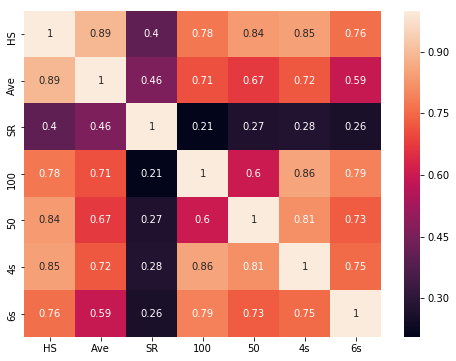

In [1061]:
plt.figure(figsize = (8,6))
sns.heatmap(df_h_run.corr(),annot = True)

* Above heatmap clearly shows some variables with high correlation.
* Let's find out which variables have the highest and lowest correlation.

In [1062]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(df_h_run.transpose())

In [1063]:
#Make a diagonal matrix with diagonal entry of Matrix corrmat
p=np.diagflat(corrmat.diagonal())

In [1064]:
# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max corr:",corrmat_diag_zero.max(), ", min corr: ", corrmat_diag_zero.min(),)


max corr: 0.891889498961291 , min corr:  0.0


In [1065]:
# Retrieve the (i,j) index for which matrix has maximum value
ij_max = np.unravel_index(corrmat_diag_zero.argmax(), corrmat_diag_zero.shape)
print("ij_max",ij_max)
print("Maximum correlation :",corrmat_diag_zero[ij_max])

ij_max (0, 1)
Maximum correlation : 0.891889498961291


Highest correlation is between 'Highest Score' and 'Average'

In [1066]:
# Retrieve the (i,j) index for which matrix has absolute minimum value
ij_min = np.unravel_index(np.absolute(corrmat).argmin(), corrmat.shape)
print("ij_min",ij_min)
print("Minimum correlation :",corrmat_diag_zero[ij_min])

ij_min (2, 3)
Minimum correlation : 0.20578385866665974


Lowest correlation is between 'Strike Rate' and 'number of centuries'

From correlation matrix we can see there is a lot of multicollinearity. Let's use PCA and reduce the number of variables.

### PCA

In [1067]:
stand_X = StandardScaler().fit_transform(df_h_run)

In [1068]:
df_h_run = pd.DataFrame(stand_X, columns = h_run)
df_h_run.head()

,HS,Ave,SR,100,50,4s,6s
0,2.863448,1.912818,0.617990,3.747566,3.005405,3.240811,5.777533
1,1.337720,1.274347,0.279288,0.353032,2.293224,0.942157,1.582229
2,2.814231,3.833380,0.763267,4.426472,2.293224,3.677264,1.462363
3,1.017809,0.260002,0.620896,-0.325875,2.293224,0.447510,1.462363
4,2.100584,1.969457,0.746664,2.389752,0.156680,0.796673,1.342497


In [1069]:
#PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [1070]:
principalComponents = pca.fit_transform(df_h_run)

In [1071]:
df_pcs = pd.DataFrame({'Feature':h_run,
                       'PC1':pca.components_[0],
                       'PC2':pca.components_[1],
                       'PC3':pca.components_[2],
                       'PC4':pca.components_[3],
                       'PC5':pca.components_[4],
                       'PC6':pca.components_[5],
                       'PC7':pca.components_[6],})
df_pcs

,Feature,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,HS,0.430781,-0.046049,0.204347,-0.198223,-0.204852,0.814768,-0.159518
1,Ave,0.390802,-0.207497,0.106072,-0.642495,-0.345849,-0.436369,0.264834
2,SR,0.191775,-0.907285,-0.186690,0.272715,0.157534,-0.014795,-0.076112
3,100,0.391660,0.237912,-0.604703,-0.179254,0.194712,-0.149426,-0.576162
4,50,0.388226,0.098138,0.676893,0.328919,0.107991,-0.337547,-0.384289
5,4s,0.416174,0.163751,-0.013428,0.011923,0.683369,0.079155,0.571318
6,6s,0.384196,0.196495,-0.296830,0.577124,-0.545013,-0.054630,0.304268


We'll plot original features on the first 2 principal components as axes

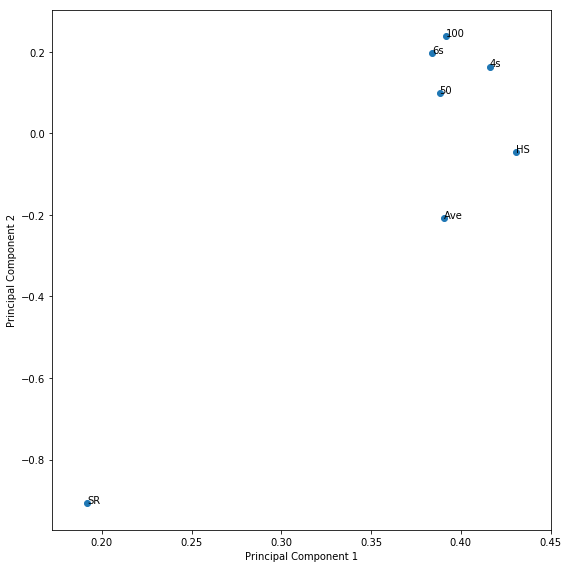

In [1072]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pcs.PC1, df_pcs.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_pcs.Feature):
    plt.annotate(txt, (df_pcs.PC1[i],df_pcs.PC2[i]))
plt.tight_layout()
plt.show()

- Looks like Highest Score and Number of 4's have the highest value in PC1.
- PC2 has number of centuries and sixes as mojor component.

Let's look at the screeplot to assess the number of principal components we would need for further analysis

Explained Variance

In [1073]:
pca.explained_variance_

array([5.04342197, 0.95387567, 0.41726111, 0.3948852 , 0.2211963 ,
       0.05856833, 0.05364857])

In [1074]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [70.6 13.4  5.8  5.5  3.1  0.8  0.8]


In [1075]:
print(pca.explained_variance_ratio_.cumsum())

[0.70607908 0.83962167 0.89803823 0.95332215 0.98428964 0.9924892
 1.        ]


In [1076]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 70.61,  83.96,  89.8 ,  95.33,  98.43,  99.25, 100.  ])

First two PCs are enough to explain 84% of the variance

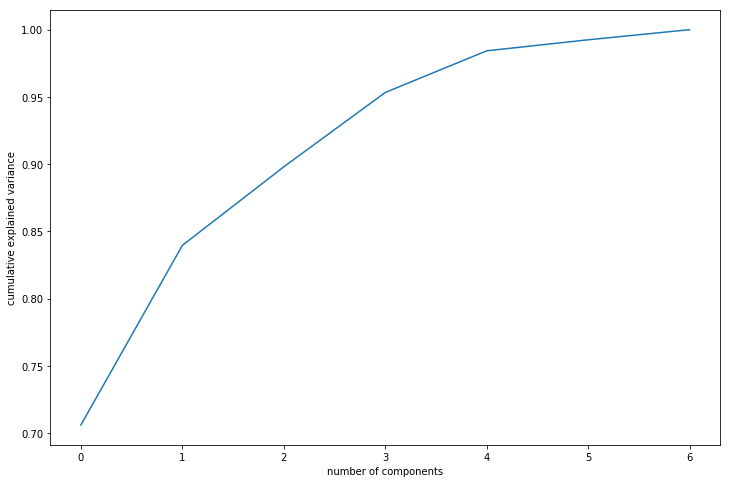

In [1077]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Let's pick two PCs

In [1078]:
pca_final = IncrementalPCA(n_components=2)

In [1079]:
# Basis transformation - get the data onto PCs
pca_final = pca_final.fit_transform(df_h_run)

In [1080]:
pca_final.shape

(50, 2)

#### Create correlation matrix for the principal components

Let's verify that the principal components are not correlated

In [1081]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_final.transpose())

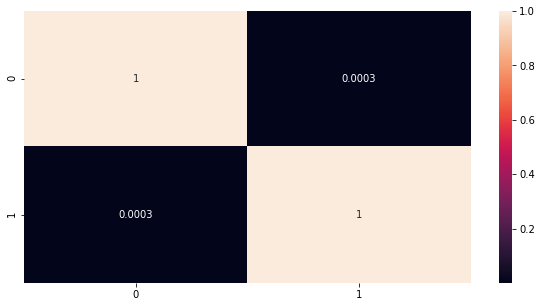

In [1082]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [1083]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.0002955171732216815 , min corr:  0.0


We see that correlations are indeed very close to 0, i.e., we have effectively removed multicollinearity from the dataset.

#### Create dataframe containing the 4 principal components

In [1084]:
df_pca_final = pd.DataFrame(data = pca_final, columns = ['PC1', 'PC2'])
df_pca_final.head()

,PC1,PC2
0,8.305760,-1.689617
1,3.154048,-0.233627
2,7.574445,-0.540358
3,2.167347,0.122264
4,3.663457,0.227161


In [1085]:
df_pca_final.shape

(50, 2)

In [1086]:
df_bat[['Player']].head()

,Player
0,RG Sharma (INDIA)
1,AT Rayudu (INDIA)
2,V Kohli (INDIA)
3,MP Stoinis (AUS)
4,SE Marsh (AUS)


In [1087]:
df_post_pca = pd.concat([df_bat[['Player']], df_pca_final], axis = 1)
df_post_pca.head(10)

,Player,PC1,PC2
0,RG Sharma (INDIA),8.305760,-1.689617
1,AT Rayudu (INDIA),3.154048,-0.233627
2,V Kohli (INDIA),7.574445,-0.540358
3,MP Stoinis (AUS),2.167347,0.122264
4,SE Marsh (AUS),3.663457,0.227161
5,AJ Finch (AUS),2.329508,-0.289440
6,S Dhawan (INDIA),4.984664,-0.538385
7,MS Dhoni (INDIA),1.442607,-0.229818
8,HH Pandya (INDIA),-0.278616,1.113865
9,GJ Maxwell (AUS),0.644805,1.127006


This is the final dataset we obtained after performing PCA and reducing the number of variables to 2.

In [1088]:
df_post_pca.sort_values(by=['PC1', 'PC2'], ascending=False).head()

,Player,PC1,PC2
0,RG Sharma (INDIA),8.305760,-1.689617
2,V Kohli (INDIA),7.574445,-0.540358
6,S Dhawan (INDIA),4.984664,-0.538385
4,SE Marsh (AUS),3.663457,0.227161
1,AT Rayudu (INDIA),3.154048,-0.233627


#### Let's plot these 2 PCs on scatter plot

No handles with labels found to put in legend.


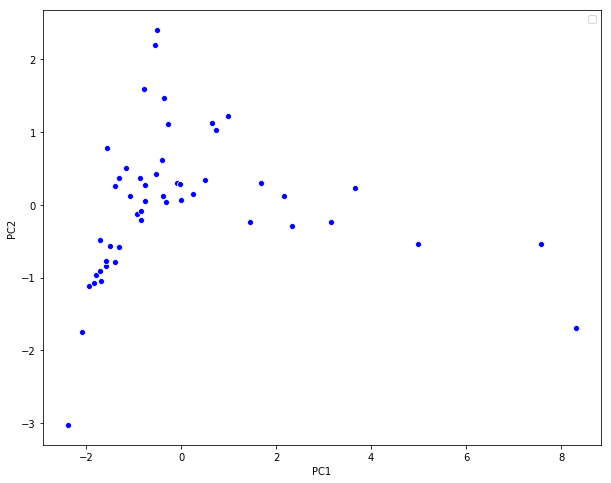

In [1089]:
fig = plt.figure(figsize = (10,8))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x=df_post_pca.PC1, 
                y=df_post_pca.PC2,  
                sizes=(20, 200), 
                color="b",
                palette=cmap)
plt.legend(loc='upper right')

#### Highest run scorer

The above data shows that the following 3 three players have a very good chance of scoring the highest runs in the series: 
- Rohit Sharma
- Virat Kohli
- Shikhar Dhawan

But since PC1 covers 70% of the variance, we wil go ahead with **Rohit Sharma** for highest run scorer of the series.

Now, let's predict player with maximum fours and maximum sixes in series.

#### Maximum sixes and Maximum fours

Scoring fours and sixes depends on the technial skills of the batsman, i.e., there are some batsmen who play technical shots and mostly go for four runs, however, there are few batsmen who like to hit big and clears the boundary from the top.

So for predicting maximum sixes and fours we can go with the past data and selects the players based on the number of sixes  and fours they have scored.

In [1090]:
# Sort data based on number of fours
df_bat.sort_values(by=['4s'], ascending=False).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
6,S Dhawan (INDIA),27,27,2,1140,127,45.60,1182,96.44,3,4,1,155,12
2,V Kohli (INDIA),20,20,5,1503,160,100.20,1532,98.10,7,4,0,145,16
0,RG Sharma (INDIA),27,27,5,1384,162,62.90,1463,94.60,6,5,1,130,52
1,AT Rayudu (INDIA),18,17,5,606,100,50.50,701,86.44,1,4,2,51,17
21,TM Head (AUS),12,12,0,339,96,28.25,364,93.13,0,4,0,49,1


Based on this data S Dhawan and V Kohli have high chances of scoring most number of fours, but as per the data we will go with **Shikhar Dhawan.**

In [1091]:
# Sort data based on number of sixes
df_bat.sort_values(by=['6s'], ascending=False).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,RG Sharma (INDIA),27,27,5,1384,162,62.9,1463,94.60,6,5,1,130,52
1,AT Rayudu (INDIA),18,17,5,606,100,50.5,701,86.44,1,4,2,51,17
2,V Kohli (INDIA),20,20,5,1503,160,100.2,1532,98.10,7,4,0,145,16
3,MP Stoinis (AUS),16,16,1,462,87,30.8,488,94.67,0,4,1,34,16
4,SE Marsh (AUS),10,10,0,640,131,64.0,655,97.70,4,1,0,46,15


In this list R Sharma is leading the list with huge margin so let's pick **Rohit Sharma.**

Now let's move ahead and predict the highest wicket-taker of the series. For this let's read and analyse the bowling statistics.

Let's now read the Bowling Statistics

In [1092]:
# Read batting stats
df_bowl = pd.read_csv('Bowling_Stats.csv')
df_bowl.head()

,Player,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,Kuldeep Yadav (INDIA),25,25,221.2,5,1045,55,25-Jun,19,4.72,24.1,4,1
1,YS Chahal (INDIA),23,23,207.1,3,1015,44,Jun-42,23.06,4.89,28.2,1,2
2,B Kumar (INDIA),22,22,163.1,10,847,26,Apr-45,32.57,5.19,37.6,1,0
3,JJ Bumrah (INDIA),13,13,100.5,9,366,22,Apr-35,16.63,3.62,27.5,1,0
4,Mohammed Shami (INDIA),9,9,78.4,2,429,17,19-Mar,25.23,5.45,27.7,0,0


In [1093]:
df_bowl.shape

(50, 13)

In [1094]:
df_bowl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
Player    50 non-null object
Mat       50 non-null int64
Inns      50 non-null object
Overs     50 non-null object
Mdns      50 non-null object
Runs      50 non-null object
Wkts      50 non-null object
BBI       50 non-null object
Ave       50 non-null object
Econ      50 non-null object
SR        50 non-null object
4         50 non-null object
5         50 non-null object
dtypes: int64(1), object(12)
memory usage: 5.2+ KB


In [1095]:
cols = ['Inns', 'Overs', 'Mdns', 'Runs', 'Wkts', 'Ave', 'Econ', 'SR', '4', '5']
df_bowl[cols] = df_bowl[cols].apply(pd.to_numeric, errors='coerce', axis=1)

df_bowl.head()

,Player,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,Kuldeep Yadav (INDIA),25,25.0,221.2,5.0,1045.0,55.0,25-Jun,19.00,4.72,24.1,4.0,1.0
1,YS Chahal (INDIA),23,23.0,207.1,3.0,1015.0,44.0,Jun-42,23.06,4.89,28.2,1.0,2.0
2,B Kumar (INDIA),22,22.0,163.1,10.0,847.0,26.0,Apr-45,32.57,5.19,37.6,1.0,0.0
3,JJ Bumrah (INDIA),13,13.0,100.5,9.0,366.0,22.0,Apr-35,16.63,3.62,27.5,1.0,0.0
4,Mohammed Shami (INDIA),9,9.0,78.4,2.0,429.0,17.0,19-Mar,25.23,5.45,27.7,0.0,0.0


In [1096]:
df_bowl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
Player    50 non-null object
Mat       50 non-null int64
Inns      37 non-null float64
Overs     37 non-null float64
Mdns      37 non-null float64
Runs      37 non-null float64
Wkts      37 non-null float64
BBI       50 non-null object
Ave       29 non-null float64
Econ      37 non-null float64
SR        29 non-null float64
4         37 non-null float64
5         37 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 5.2+ KB


In [1097]:
df_bowl.head()

,Player,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,Kuldeep Yadav (INDIA),25,25.0,221.2,5.0,1045.0,55.0,25-Jun,19.00,4.72,24.1,4.0,1.0
1,YS Chahal (INDIA),23,23.0,207.1,3.0,1015.0,44.0,Jun-42,23.06,4.89,28.2,1.0,2.0
2,B Kumar (INDIA),22,22.0,163.1,10.0,847.0,26.0,Apr-45,32.57,5.19,37.6,1.0,0.0
3,JJ Bumrah (INDIA),13,13.0,100.5,9.0,366.0,22.0,Apr-35,16.63,3.62,27.5,1.0,0.0
4,Mohammed Shami (INDIA),9,9.0,78.4,2.0,429.0,17.0,19-Mar,25.23,5.45,27.7,0.0,0.0


In [1098]:
# Check for NaN values in dataset
print(df_bowl.isnull().values.any())
print(df_bowl.isnull().values.sum())

True
146


In [1099]:
df_bowl.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     2
30     2
31     2
32     2
33     2
34     2
35     2
36     2
37    10
38    10
39    10
40    10
41    10
42    10
43    10
44    10
45    10
46    10
47    10
48    10
49    10
dtype: int64

In [1100]:
# Let's drop the rows with NaN values
df_bowl.dropna(inplace=True)

In [1101]:
# Let's make sure that there are no duplicate rows in the dataset
sum(df_bowl.duplicated(subset = 'Player')) == 0

True

There are no duplicate rows in the dataset.

In [1102]:
# Let's sort the dataframe by Wickets taken and check the result
df_bowl.sort_values(by=['Wkts'], ascending=False).head()

,Player,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,Kuldeep Yadav (INDIA),25,25.0,221.2,5.0,1045.0,55.0,25-Jun,19.00,4.72,24.1,4.0,1.0
1,YS Chahal (INDIA),23,23.0,207.1,3.0,1015.0,44.0,Jun-42,23.06,4.89,28.2,1.0,2.0
2,B Kumar (INDIA),22,22.0,163.1,10.0,847.0,26.0,Apr-45,32.57,5.19,37.6,1.0,0.0
3,JJ Bumrah (INDIA),13,13.0,100.5,9.0,366.0,22.0,Apr-35,16.63,3.62,27.5,1.0,0.0
4,Mohammed Shami (INDIA),9,9.0,78.4,2.0,429.0,17.0,19-Mar,25.23,5.45,27.7,0.0,0.0


Observations:
- Top 5 bowlers in wicket taking category are Indians.
- Match is in India, so there are good chances Indian players might take more wickets as they are well versed with the conditions.

- But total wickets taken in past cannot be used for precdicting the highest wicket taker of the series.
- Other variables like Mdns, Wkts, Ave, Econ, also plays an important role.

Let's check if there is any correlation between these variables.

In [1103]:
df_bowl.columns

Index(['Player', 'Mat', 'Inns', 'Overs', 'Mdns', 'Runs', 'Wkts', 'BBI', 'Ave',
       'Econ', 'SR', '4', '5'],
      dtype='object')

In [1104]:
# These variables will play important role in predicting the highest scorer
h_wkt = ['Mdns', 'Wkts', 'Ave', 'Econ']
df_h_wkt = df_bowl[h_wkt]

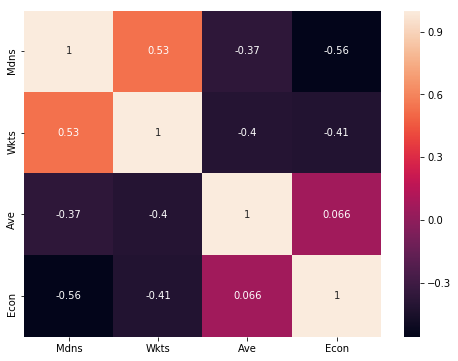

In [1105]:
plt.figure(figsize = (8,6))
sns.heatmap(df_h_wkt.corr(),annot = True)

* Above heatmap shows some variables with negative correlation. For e.g.
    - Econ and Mdns - This means a player with more maiden overs has a better the economy rate.

From correlation matrix we can see there is a lot of multicollinearity. Let's use PCA and reduce the number of variables.

### PCA

In [1106]:
stand_X = StandardScaler().fit_transform(df_h_wkt)

In [1107]:
df_h_wkt = pd.DataFrame(stand_X, columns = h_wkt)
df_h_wkt.head()

,Mdns,Wkts,Ave,Econ
0,1.030429,3.550394,-0.748304,-0.861116
1,0.254262,2.662796,-0.650454,-0.716472
2,2.970847,1.210362,-0.421253,-0.461218
3,2.582763,0.887599,-0.805424,-1.797049
4,-0.133822,0.484145,-0.598155,-0.239998


In [1108]:
#PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [1109]:
principalComponents = pca.fit_transform(df_h_wkt)

In [1110]:
df_pcs = pd.DataFrame({'Feature':h_wkt,
                       'PC1':pca.components_[0],
                       'PC2':pca.components_[1],
                       'PC3':pca.components_[2],
                       'PC4':pca.components_[3]})
df_pcs

,Feature,PC1,PC2,PC3,PC4
0,Mdns,0.576219,0.121337,-0.375476,0.715728
1,Wkts,0.544810,-0.113990,0.830613,0.016454
2,Ave,-0.383188,0.774577,0.350486,0.361051
3,Econ,-0.473625,-0.610176,0.215081,0.597582


We'll plot original features on the first 2 principal components as axes

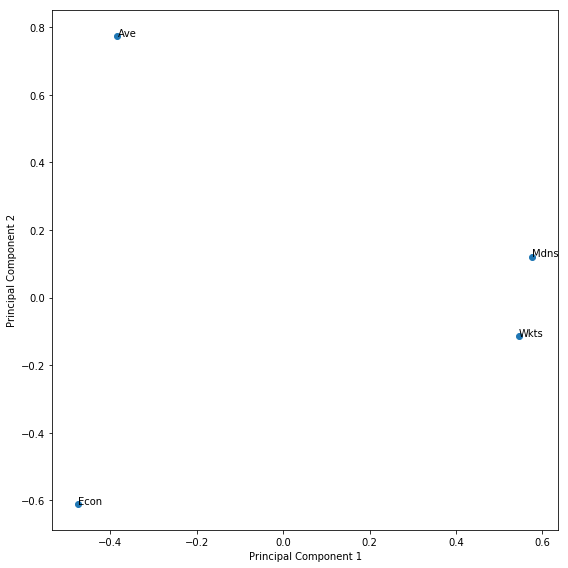

In [1111]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pcs.PC1, df_pcs.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_pcs.Feature):
    plt.annotate(txt, (df_pcs.PC1[i],df_pcs.PC2[i]))
plt.tight_layout()
plt.show()

- Looks like number of maiden overs and Number of wickets have the highest value in PC1.
- PC2 has average runs given per over as a mojor component.

Let's look at the screeplot to assess the number of principal components we would need for further analysis

Explained Variance

In [1112]:
pca.explained_variance_

array([2.28525839, 0.98329059, 0.49937947, 0.37492869])

In [1113]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [55.2 23.7 12.1  9.1]


In [1114]:
print(pca.explained_variance_ratio_.cumsum())

[0.55161409 0.7889601  0.90949997 1.        ]


In [1115]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([55.16, 78.89, 90.94, 99.99])

First three PCs explain 91% of the variance

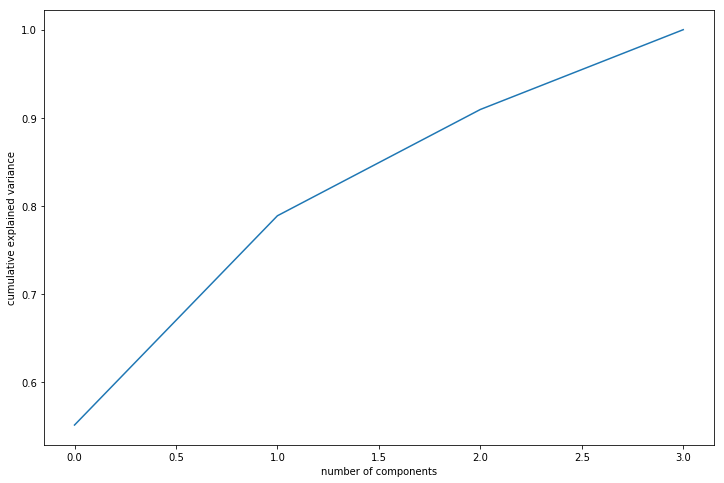

In [1116]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Let's pick two PCs

In [1117]:
pca_final = IncrementalPCA(n_components=3)

In [1118]:
# Basis transformation - get the data onto PCs
pca_final = pca_final.fit_transform(df_h_wkt)

In [1119]:
pca_final.shape

(29, 3)

#### Create correlation matrix for the principal components

Let's verify that the principal components are not correlated

In [1120]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_final.transpose())

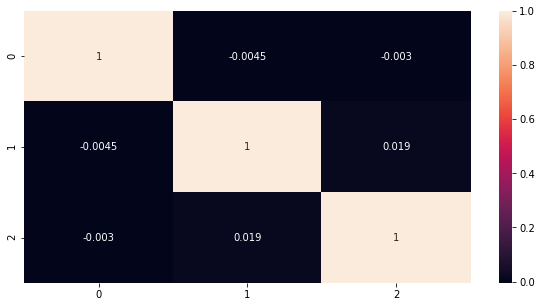

In [1121]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [1122]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.018535812811246496 , min corr:  -0.00451297433087619


We see that correlations are indeed very close to 0, i.e., we have effectively removed multicollinearity from the dataset.

#### Create dataframe containing the 4 principal components

In [1123]:
df_pca_final = pd.DataFrame(data = pca_final, columns = ['PC1', 'PC2', 'PC3'])
df_pca_final.head()

,PC1,PC2,PC3
0,3.224447,-0.408318,2.097837
1,2.186560,-0.392555,1.732032
2,2.752981,0.152063,-0.405149
3,3.134040,0.686729,-0.901905
4,0.527395,-0.390665,0.192100


In [1124]:
df_pca_final.shape

(29, 3)

In [1125]:
df_bowl[['Player']].head()

,Player
0,Kuldeep Yadav (INDIA)
1,YS Chahal (INDIA)
2,B Kumar (INDIA)
3,JJ Bumrah (INDIA)
4,Mohammed Shami (INDIA)


In [1126]:
df_post_pca = pd.concat([df_bowl[['Player']], df_pca_final], axis = 1)
df_post_pca.head(10)

,Player,PC1,PC2,PC3
0,Kuldeep Yadav (INDIA),3.224447,-0.408318,2.097837
1,YS Chahal (INDIA),2.186560,-0.392555,1.732032
2,B Kumar (INDIA),2.752981,0.152063,-0.405149
3,JJ Bumrah (INDIA),3.134040,0.686729,-0.901905
4,Mohammed Shami (INDIA),0.527395,-0.390665,0.192100
5,MP Stoinis (AUS),-0.151061,-0.636565,0.586901
6,RA Jadeja (INDIA),1.163159,0.186812,-0.239182
7,JA Richardson (AUS),0.879051,-0.265663,-0.454672
8,AJ Tye (AUS),-0.235396,-0.571685,0.172690
9,KK Ahmed (INDIA),0.249635,-0.174686,-0.173675


This is the final dataset we obtained after performing PCA and reducing the number of variables to 2.

In [1127]:
df_post_pca.sort_values(by=['PC1', 'PC2', 'PC3'], ascending=False).head()

,Player,PC1,PC2,PC3
0,Kuldeep Yadav (INDIA),3.224447,-0.408318,2.097837
3,JJ Bumrah (INDIA),3.134040,0.686729,-0.901905
2,B Kumar (INDIA),2.752981,0.152063,-0.405149
1,YS Chahal (INDIA),2.186560,-0.392555,1.732032
13,PJ Cummins (AUS),1.460851,0.460170,-1.208903


#### Let's plot these 2 PCs on scatter plot

No handles with labels found to put in legend.


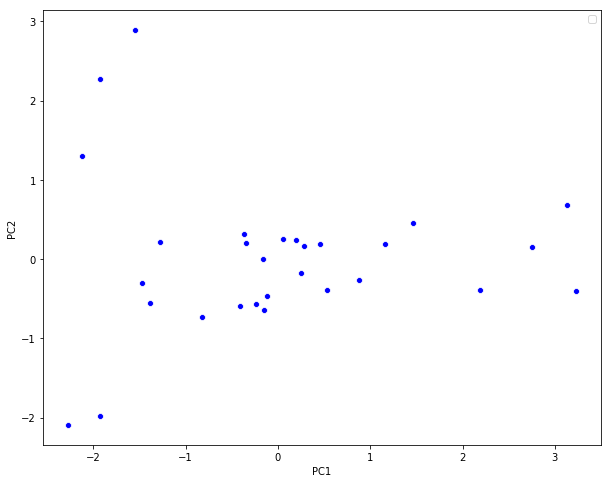

In [1128]:
fig = plt.figure(figsize = (10,8))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x=df_post_pca.PC1, 
                y=df_post_pca.PC2,  
                sizes=(20, 200), 
                color="b",
                palette=cmap)
plt.legend(loc='upper right')

#### Highest wicket-taker

The above data shows that the following two players have a very good chance of taking highest wickets in the series: 
- Kuldeep Yadav
- Jasprit Bumrah

Kuldeep Yadav is on top, but PC1 only explains 55% of the variance, so if we consider both PC1 and PC2 then seems like most wickets in the series will be taken by **Jasprit Bumrah.**

### Final Prediction

As per the analysis done by us we have predicted the following results:

|   |  |
|---|---|---|
| Winner of the series  | India  |
| Series output  | 4-1  |
| Highest run scorer | Rohit Sharma  |
| Highest wicket-taker  | Jasprit Bumrah |
| Maximum sixes  | Rohit Sharma  |
| Maximum fours  | Shikhar Dhawan  |